In [29]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
%matplotlib inline

In [30]:
def res1(x):
    a = max(x[0], x[1]) >= 0
    b = 5*x[0] - 4*x[1] - max(2*x[0], 1*x[1]) * 0.7 <= 10.8
    c = 5*x[0] - 4*x[1] + max(2*x[0], 1*x[1]) * 0.7 >= 5.2
    
    return a and b and c

def res2(x):
    a = max(x[0], x[1]) >= 0
    b = 3*x[0] - 5*x[1] - max(0.5*x[0], 1*x[1]) * 0.6 <= 2.9
    c = 3*x[0] - 5*x[1] + max(0.5*x[0], 1*x[1]) * 0.6 >= 1.1

    return a and b and c

In [31]:
def energy(x):
    r1 = res1(x)
    r2 = res2(x)

    return x[0] + 5*x[1] + 0.2 * max(x[0], x[1]) if r1 and r2 else None

In [32]:
T = 1000000
ep = 1000000
P = 0

In [33]:
def Tm(initialTemperature, i):
    T = initialTemperature * 1 / i
    return T

In [34]:
def takestate(state):
    ub = 12.0
    lb = 0.0
    state_new = np.random.uniform(0, 1, (1, 2)) * (ub - lb) + lb
    state_new = state_new[0]
    return state_new

In [35]:
ub = 12.0
lb = 0.0

In [36]:
E_can = None
while E_can is None:
    init_r = np.random.uniform(0, 1, (1, 2)) * (ub - lb) + lb
    init_r = init_r[0]
    E_can = energy(init_r)

In [37]:
E_curr = E_can
R_max = init_r

In [38]:
for t in range(1):
    for e in range(ep):
        r_new = takestate(init_r)
        E_can = energy(r_new)
        if E_can != None:
            if E_can > E_curr: 
                E_curr = E_can
                R_max = r_new
            elif E_can <= E_curr:
                dE = E_can - E_curr
                P = math.exp(-dE/T)
                Rand = random.random()
                if Rand - P > 0:
                    E_curr = E_can
                    R_max = r_new
    r = R_max.tolist()
    print(r)
    f = open("test.txt", "a")
    f.write(str(r[0]) +' '+ str(r[1]) +'\n')
    f.close()

[11.210365457164452, 7.389968267820487]


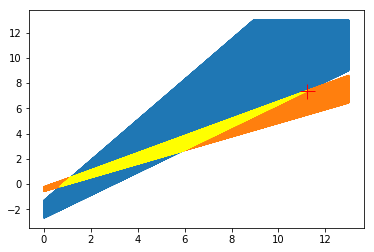

In [39]:
xx0 = []
yy0 = []
xx1 = []
yy1 = []
xx2 = []
yy2 = []

r = np.arange(-10.0, 13.0, 0.01)
for y in r:
    for x in r:
        r1 = res1([x, y])
        r2 = res2([x, y])
        if r1 and r2:
            xx0.append(x)
            yy0.append(y)
        elif r1:
            xx1.append(x)
            yy1.append(y)
        elif r2:
            xx2.append(x)
            yy2.append(y)

plt.plot(xx1, yy1)
plt.plot(xx2, yy2)
plt.plot(xx0, yy0, 'yellow')
plt.plot(R_max[0], R_max[1], 'r+', markersize=15)
plt.show()